In [264]:
import pandas as pd

df = pd.read_csv("../../_Data/ITHS_machine_learning_lab/cardio_train.csv", sep = ";")

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [266]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: ylabel='cholesterol'>

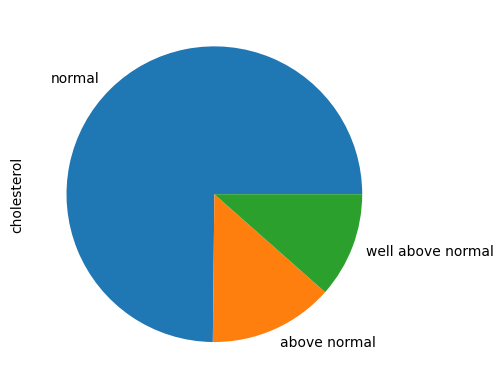

In [268]:
df["cholesterol"].value_counts().plot(kind = "pie", labels = ["normal", "above normal", "well above normal"])

In [269]:
df["age_years"] = df["age"] / 365

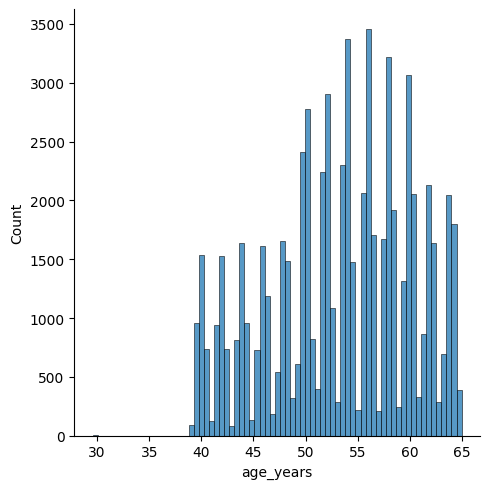

In [270]:
import seaborn as sns

sns.displot(df["age_years"])

In [271]:
df["smoke"].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

<Axes: xlabel='height', ylabel='Count'>

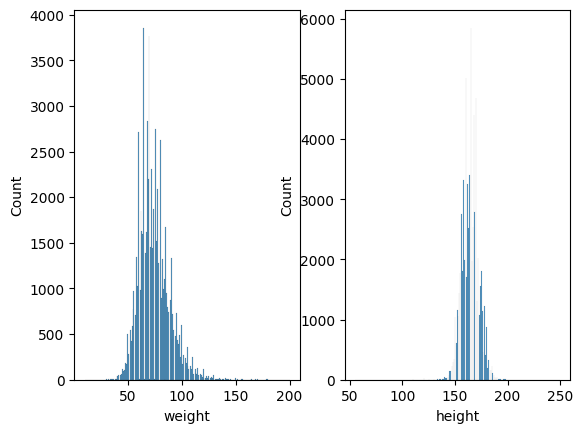

In [272]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)

sns.histplot(df["weight"], ax = ax[0])
sns.histplot(df["height"], ax = ax[1])

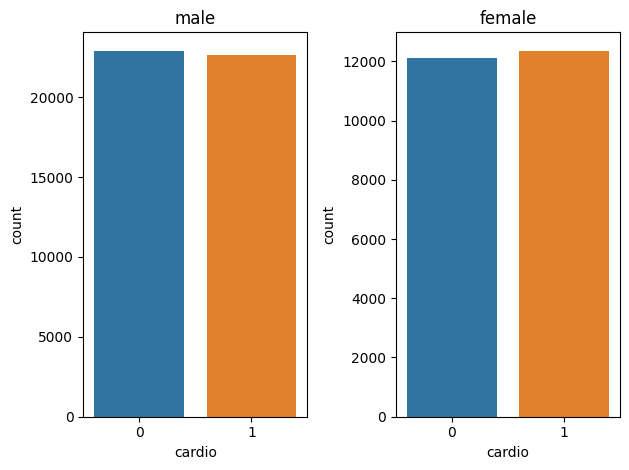

In [273]:
# print(df["gender"].value_counts())

fig, ax = plt.subplots(1,2)

lst = ["male", "female"]

for i in range(2):
    df_ = df[df["gender"] == i+1]
    sns.countplot(data= df_, x="cardio", ax=ax[i])
    ax[i].set_title(lst[i])

fig.tight_layout()
# sns.barplot()

## 2.1.0 Feature engineering BMI

In [274]:
df["bmi"] = df["weight"] / (df["height"]/100)**2

<Axes: xlabel='bmi', ylabel='Count'>

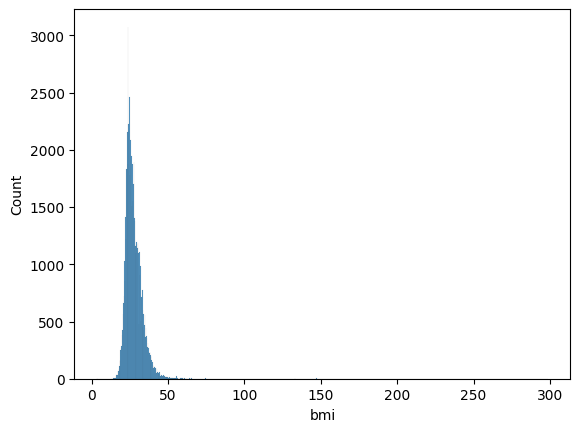

In [275]:
sns.histplot(df["bmi"])

<Axes: >

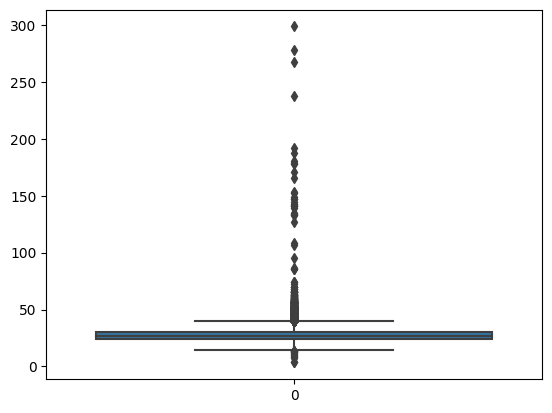

In [276]:
sns.boxplot(df["bmi"])

12.682860022911978 41.905536328835154


68395

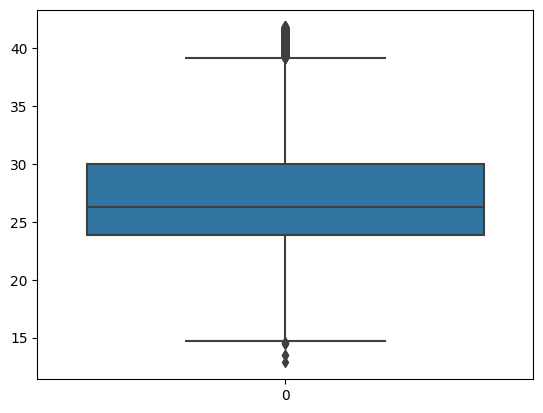

In [277]:
# using 3 stdev instead of IQR because we want the full normal distribution

lst = ["height", "weight", "bmi"]

for i in lst:
    upper = df[i].mean() + 3 * df[i].std()
    lower = df[i].mean() - 3 * df[i].std()

    df = df[df[i].between(lower, upper)]

sns.boxplot(df["bmi"])


print(lower, upper) # (13, 42) seems reasonable

In [281]:
df.shape

(68395, 15)

<Axes: xlabel='bmi', ylabel='Count'>

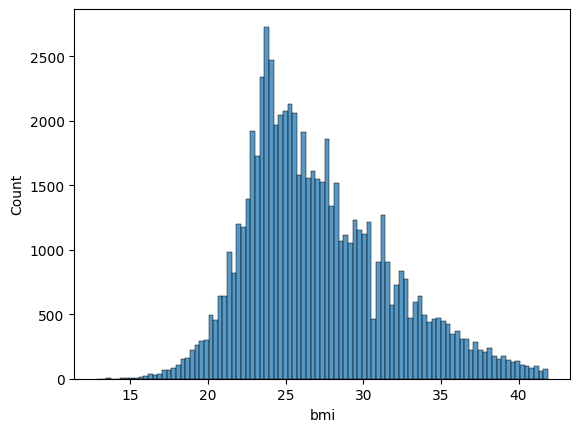

In [278]:
# positive skew which is in line with previously observed distributions of bmi
sns.histplot(filtered_df["bmi"])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'overweight'),
  Text(2, 0, 'obese (class I)'),
  Text(3, 0, 'obese (class II)'),
  Text(4, 0, 'obese (class III)')])

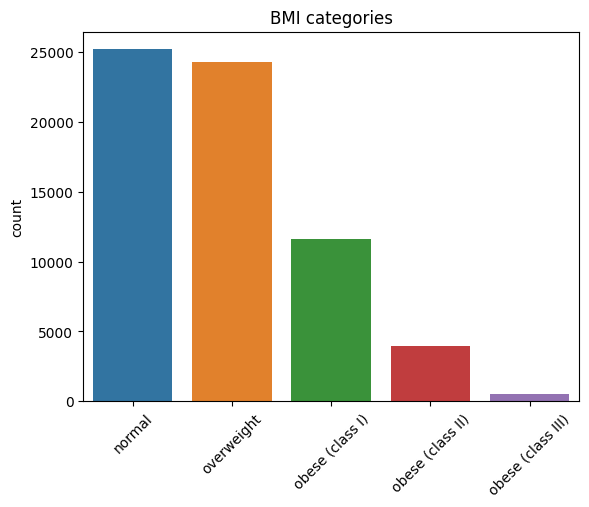

In [478]:
# create bmi categories
df["bmi_class"] = None

class_list = [
    "normal",
    "overweight",
    "obese (class I)",
    "obese (class II)",
    "obese (class III)",
]
df.loc[df["bmi"].between(18.5, 25), "bmi_class"] = 1
df.loc[df["bmi"].between(25, 30), "bmi_class"] = 2
df.loc[df["bmi"].between(30, 35), "bmi_class"] = 3
df.loc[df["bmi"].between(35, 40), "bmi_class"] = 4
df.loc[df["bmi"] >= 40, "bmi_class"] = 5

fig, ax = plt.subplots()
sns.countplot(df, x="bmi_class", order=list(range(1,6)))
ax.set_title("BMI categories")
ax.set_xticklabels(class_list)
ax.set_xlabel("")
plt.xticks(rotation=45)

In [360]:
df["bmi_class"].count()

67770

In [383]:
# blood pressure
df['ap_hi'].describe()

count    68395.000000
mean       128.634754
std        155.769556
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [422]:
# exclude those whose diastolic bp is higher than their systolic bp
df = df[df["ap_hi"] > df["ap_lo"]]

In [429]:
# < 90: hypotension
# > 140: hypertension
# including 30 below and above (should not reach hypertensive crisis)
print(df["ap_hi"].between(60, 170).sum())
df = df[df["ap_hi"].between(60, 170)]

66315


In [401]:
df["ap_lo"].describe()

count    68395.000000
mean        96.142569
std        188.843938
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [443]:
# > 90: hypertension
# < 60: hypotension
# including 20 below and above (should not reach hypertensive crisis)
df = df[df["ap_lo"].between(40, 110)]

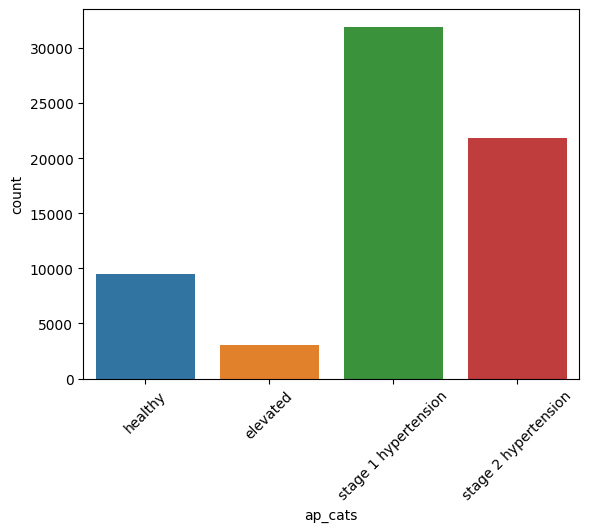

In [487]:
cat_list = ["healthy", "elevated", "stage 1 hypertension", "stage 2 hypertension"]

df["ap_cats"] = None
df.loc[((df["ap_hi"] < 120) & (df["ap_lo"] < 80)), "ap_cats"] = 1
df.loc[((df["ap_hi"].between(120, 129)) & (df["ap_lo"] < 80)), "ap_cats"] = 2
df.loc[
    ((df["ap_hi"].between(130, 139)) | (df["ap_lo"].between(80, 89))), "ap_cats"
] = 3
df.loc[((df["ap_hi"] >= 140) | (df["ap_lo"] >= 90)), "ap_cats"] = 4
df["ap_cats"].value_counts()

fig, ax = plt.subplots()

sns.countplot(df, x="ap_cats", order = list(range(1,5)))
ax.set_xticklabels(cat_list)
plt.xticks(rotation=45);


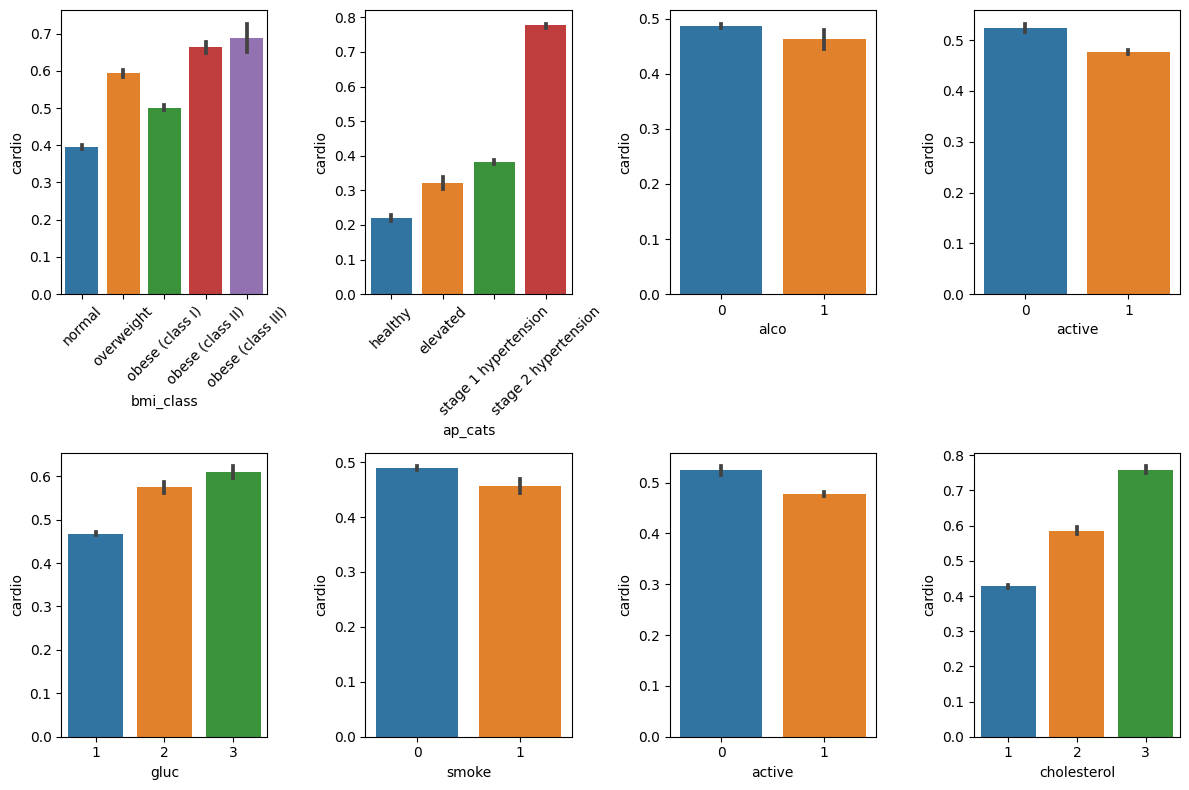

In [528]:
# visualizing categorical features vs cardiovascular disease

fig, ax = plt.subplots(2,4, figsize = (12, 8))
ax = ax.flatten()

list_categorical = ["bmi_class", "ap_cats", "alco", "active", "gluc", "smoke", "active", "cholesterol"]

for i, cat in enumerate(list_categorical):
    sns.barplot(df, x = cat, y = "cardio", ax = ax[i])
    
ax[0].set_xticklabels(class_list, rotation = 45)
ax[1].set_xticklabels(cat_list, rotation = 45)

# ax[0].set
fig.tight_layout()


<Axes: >

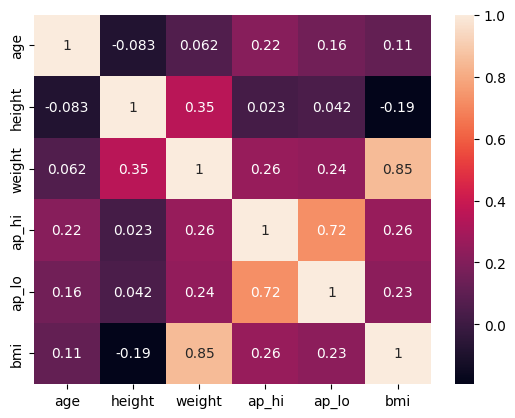

In [540]:
# visualizing correlations
list_numerical = ["age", "height", "weight", "ap_hi", "ap_lo", "bmi"]

sns.heatmap(df.loc[:, list_numerical].corr(), annot=True)

## Modeling

In [598]:
# create two data sets

df["gender"] = pd.Categorical(df["gender"]) # specify categorical for one-hot encoding

df1 = df.drop(["ap_hi", "ap_lo", "height", "weight", "bmi", "age_years"], axis=1)
df2 = df.drop(["bmi_class", "ap_cats", "height", "weight", 'age_years'], axis=1)

# pd.get_dummies(df2, drop_first=True)
hot_list = ["gender", "bmi_class", "ap_cats"]

df1_ones = pd.get_dummies(df[hot_list])
df1 = df1.drop(hot_list, axis=1)
df1 = df1.join(df1_ones)
df1.rename({"gender_2": "gender"}, axis=1, inplace=True)
df1 = df1.drop("gender_1", axis=1)

df2_ones = pd.get_dummies(df["gender"], drop_first=True)
df2_ones.rename({2: "gender"}, axis=1, inplace=True)
df2 = df2.drop("gender", axis=1)
df2 = df2.join(df2_ones)

/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/3284511071.py:11: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1_ones = pd.get_dummies(df[hot_list])
/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/3284511071.py:11: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1_ones = pd.get_dummies(df[hot_list])


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender
0,0,18393,110,80,1,1,0,0,1,0,21.967120,1
1,1,20228,140,90,3,1,0,0,1,1,34.927679,0
2,2,18857,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,130,90,1,1,0,0,1,1,23.661439,0
69994,99992,21074,150,80,1,1,0,0,1,1,29.384757,0
69995,99993,19240,120,80,1,1,1,0,1,0,26.927438,1
69998,99998,22431,135,80,1,2,0,0,0,1,27.099251,0
